## Using the Best Models

Original Kernel:
https://www.kaggle.com/roydatascience/chemistry-of-best-models-1-835

Submissions used:
- https://www.kaggle.com/yamqwe/ah-yes-enslaved-domain-knowledge
- https://www.kaggle.com/yamqwe/deep-learning-fork-and-tweaks/output
- https://www.kaggle.com/filemide/distance-criskiev-hyparam-cont-1-66
- https://www.kaggle.com/abazdyrev/nn-w-o-skew
- https://www.kaggle.com/harshit92/fork-from-kernel-1-481
- https://www.kaggle.com/marcogorelli/criskiev-s-distances-more-estimators-groupkfold
- https://www.kaggle.com/marcelotamashiro/lgb-public-kernels-plus-more-features
- https://www.kaggle.com/raimonds1993/lgbm-predicting-molecular-properties
- https://www.kaggle.com/fnands/1-mpnn
- https://www.kaggle.com/vandalzzz/lgb-v3-5-lb-1-657
- https://www.kaggle.com/xwxw2929/keras-neural-net-and-distance-features
- https://www.kaggle.com/xwxw2929/best-score-of-each-type-combination
- https://www.kaggle.com/raimonds1993/schnet-starter-kit
- https://www.kaggle.com/filemide/chemistry-of-best-models-1-801/output

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

champs-scalar-coupling
my-chemistrymodels



In [2]:
sub_path = "../input/my-chemistrymodels"
all_files = os.listdir(sub_path)
all_files

['submission-1.679.csv',
 'submission-1.286.csv',
 'submission-1.302_fede.csv',
 'submission-1.419.csv',
 'submission-1.681.csv',
 'submission-1.648.csv',
 'submission-1.415.csv',
 'submission-1.674.csv',
 'submission-1.658.csv',
 'submission-1.667.csv',
 'submission-1.619.csv',
 'submission-1.643.csv',
 'submission-1.672.csv',
 'submission-1.618.csv']

In [3]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

## Check Submissions Correlation

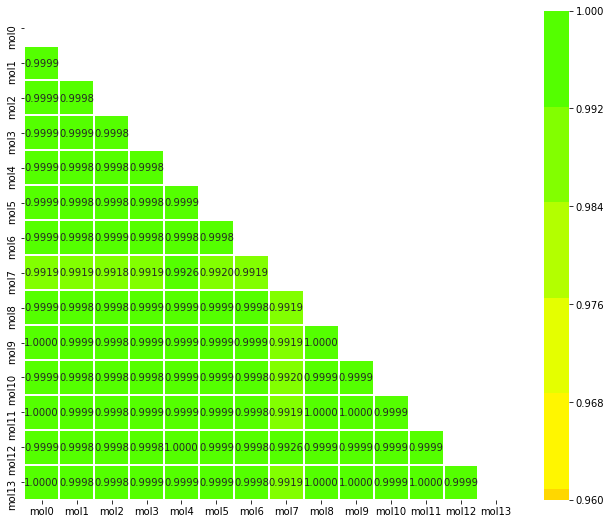

In [4]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [5]:
# get the data fields ready for stacking
concat_sub['m_max'] = concat_sub.iloc[:, 1:].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)

In [6]:
concat_sub.describe()

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,m_max,m_min,m_median
count,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.587919e+01,1.583679e+01,1.588486e+01,1.588176e+01,1.588214e+01,1.588320e+01,1.588650e+01,1.588460e+01,1.588607e+01,1.588602e+01,1.587951e+01,1.588595e+01,1.588054e+01,1.588590e+01,1.633018e+01,1.543244e+01,1.588005e+01
std,7.232878e+05,3.487221e+01,3.490001e+01,3.485721e+01,3.490540e+01,3.486111e+01,3.485671e+01,3.486398e+01,3.513931e+01,3.486318e+01,3.486279e+01,3.485677e+01,3.486263e+01,3.485870e+01,3.486285e+01,3.536327e+01,3.465565e+01,3.486436e+01
min,4.658147e+06,-2.818917e+01,-3.632142e+01,-3.027740e+01,-2.480043e+01,-3.309956e+01,-3.299384e+01,-3.228784e+01,-3.315324e+01,-3.384381e+01,-3.258725e+01,-3.706147e+01,-3.297185e+01,-3.309956e+01,-3.318558e+01,-2.370641e+01,-3.706147e+01,-3.234486e+01
25%,5.284532e+06,-2.357559e-01,-2.987248e-01,-2.159886e-01,-2.568281e-01,-2.461876e-01,-2.502056e-01,-2.295558e-01,-2.453283e-01,-2.443731e-01,-2.431038e-01,-2.484849e-01,-2.450764e-01,-2.461876e-01,-2.455747e-01,3.439570e-02,-5.194584e-01,-2.389084e-01
50%,5.910918e+06,2.270879e+00,2.236193e+00,2.306440e+00,2.255419e+00,2.278162e+00,2.282187e+00,2.293922e+00,2.281530e+00,2.281118e+00,2.280120e+00,2.279487e+00,2.281808e+00,2.278162e+00,2.282089e+00,2.624907e+00,1.938616e+00,2.274912e+00
75%,6.537303e+06,7.325987e+00,7.295093e+00,7.262814e+00,7.302716e+00,7.355285e+00,7.377225e+00,7.351437e+00,7.358020e+00,7.357556e+00,7.353575e+00,7.356561e+00,7.356357e+00,7.355285e+00,7.357853e+00,7.806855e+00,6.824632e+00,7.339532e+00
max,7.163688e+06,2.031059e+02,2.041366e+02,2.031802e+02,2.056026e+02,2.844774e+02,2.085859e+02,2.060015e+02,7.001663e+03,2.048760e+02,2.044570e+02,3.161125e+02,2.036596e+02,2.844774e+02,2.036310e+02,7.001663e+03,2.020730e+02,2.039927e+02


# Median Stacking

In [7]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')